# Modelo de Rede Neural Simples para Regressão

- Desenvolvido como teste e estudo inicial de backpropagation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [334]:
plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = (10, 8)

## CRIAÇÃO DO DATASET DE TESTE

- Teste da rede neural para encontrar uma função de conversão de graus celsius para fahrenheit

In [335]:
def get_linear_curve(x: np.ndarray, w: float, b: float = 0, noise_scale: float = 0):
  '''
    @param x: input 
    @param w: weight (inclinação da reta)
    @param b: bias 
    @param noise_scale: Taxa do ruido
  '''
  return w*x+b + noise_scale*np.random.randn(x.shape[0]) #Simula um ruido


In [336]:
x = np.arange(-10, 30.1, 0.5)

# Teste com ruido aleatorio de amplitude 5
y = get_linear_curve(x, 1.8, 32, noise_scale=5)


### VISUALIZAÇÃO DOS DADOS

Text(0, 0.5, 'ºF')

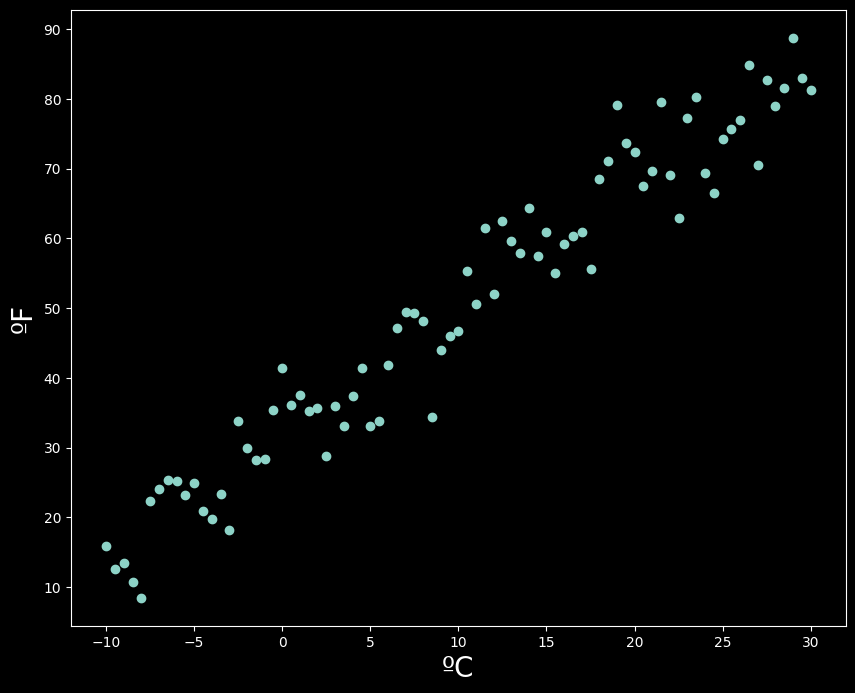

In [337]:
plt.scatter(x, y)
plt.xlabel("ºC", fontsize=20)
plt.ylabel("ºF", fontsize=20)

# Modelo de Rede Neural

- Entradas: Temperatura em Celsius
- Saida: Temperatura em Fahrenheit
- Pesos e bias: Deveremos encontrar peso = 1.8 e bias = 32

### Etapas

- Inicializar os pesos e bias aleatoriamente
- Passo de treinamento: Feedforward e Backpropagation
- Calcular a perda/erro da rede neural
- Backpropagation: Atualizar os pesos e bias

In [338]:
# Inicializar

w = np.random.randn(1)
b = 0

In [339]:
def forward(inputs, w, bias):
  '''
  @param inputs: input (vetor de entradas)
  @param w: (Vetor de pesos)
  @param b: bias
  '''
  return w*inputs+bias

In [340]:
def mse(y_true, y_hat):
  '''
  Função de perda
  @param y_true: valor real
  @param Y_hat: valor predito
  '''
  return (y_true-y_hat)**2

In [341]:
def backpropagation(inputs, outputs, w, b, target, lr=0.3):
  '''
  @param inputs: Entradas
  @param outputs: Saidas
  @param target: Alvo
  @param lr: Taxa de aprendizado
  '''
  dw = (-2*inputs*(target-outputs)).mean()
  db = (-2*(target-outputs)).mean()

  w -= lr* dw
  b -= lr* db
  return w, b

In [342]:
def model_fit(inputs, target, w, b=0, epochs=1000, lr=0.01):  
    for ep in range(epochs):
        outputs = forward(inputs, w, b)
        loss = np.mean(mse(target, outputs))
        w, b = backpropagation(inputs, outputs, w, b, target, lr)
        if (ep + 1) % (epochs / 10) == 0:
            print(f"Epoch [{ep+1}/{epochs}]: loss = {loss:.4f} -> w = {w}, b = {b}")
    return w, b

In [343]:
x = np.arange(-10, 30.1, 0.5)

# Teste com ruido aleatorio de amplitude 5
y = get_linear_curve(x, 1.8, 32, noise_scale=5)

In [344]:
w = np.random.randn(1)
b = np.zeros(1)

w, b = model_fit(x, y, w, b, epochs=100000, lr=0.0001)

print(f'Predição Final: w = {w}, b = {b}')

Epoch [10000/100000]: loss = 80.7076 -> w = [2.2286019], b = [22.19792393]
Epoch [20000/100000]: loss = 26.8725 -> w = [1.93369741], b = [29.16033105]
Epoch [30000/100000]: loss = 21.5066 -> w = [1.84059325], b = [31.35842925]
Epoch [40000/100000]: loss = 20.9718 -> w = [1.81119938], b = [32.05238978]
Epoch [50000/100000]: loss = 20.9185 -> w = [1.80191946], b = [32.27147973]
Epoch [60000/100000]: loss = 20.9131 -> w = [1.7989897], b = [32.34064851]
Epoch [70000/100000]: loss = 20.9126 -> w = [1.79806474], b = [32.36248575]
Epoch [80000/100000]: loss = 20.9126 -> w = [1.79777273], b = [32.36937997]
Epoch [90000/100000]: loss = 20.9125 -> w = [1.79768053], b = [32.37155655]
Epoch [100000/100000]: loss = 20.9125 -> w = [1.79765143], b = [32.37224371]
Predição Final: w = [1.79765143], b = [32.37224371]


Text(0, 0.5, 'ºF')

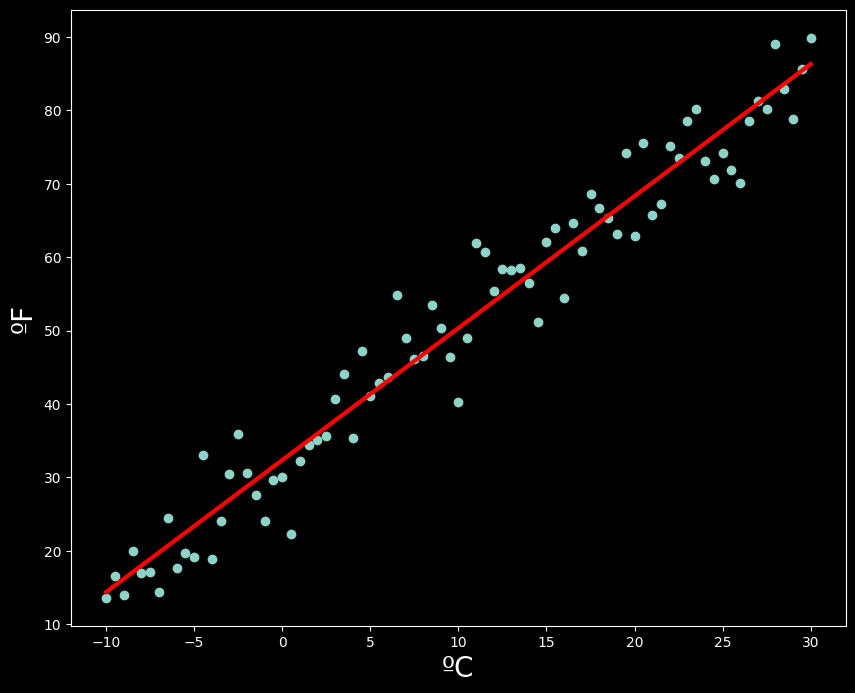

In [345]:
plt.scatter(x, y)
plt.plot(x, get_linear_curve(x, w, b), 'r', lw=3)
plt.xlabel("ºC", fontsize=20)
plt.ylabel("ºF", fontsize=20)